<a href="https://colab.research.google.com/github/Danieli4/Forecast/blob/master/%D0%9F%D0%BE%204%20%D1%86%D0%B8%D1%84%D1%80%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:

# multivariate output 1d cnn example
#import tf as tf
from numpy import array
import tensorflow as tf
import numpy as np
import pandas as pd
from numpy import hstack
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, LSTM, LeakyReLU
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D, Conv2D
from keras.layers.convolutional import MaxPooling1D
from keras.preprocessing.sequence import TimeseriesGenerator

import matplotlib.pyplot as plt



In [20]:
# horizontally stack columns
#dataset_new = hstack((in_seq1, in_seq2, in_seq3, in_seq4, in_seq5, in_seq6))
#dataset_new= np.array(range(0,54,1)).reshape(9,6)
dataset_new=np.random.randint(1,20,12000).reshape(3000,4)
#%%

validat_x = dataset_new[-101:-1]
validat_y = dataset_new[-1:]
validat_y

#%%

# нужно вычесть 5429+validat_x[!это!:]
dataset = dataset_new[:199899]


In [34]:
#f = open("/4-20.xlsx";"w",encoding="unicode")
data= pd.read_csv("/4-20.csv", sep = ';')
data
dataset_n = data[['1','2','3','4']]
print (data.columns)
validat_x = dataset_n[-101:-1]
validat_y = dataset_n[-1:]
validat_x
dataset = dataset_n[:2810].to_numpy()
dataset.shape
dataset_val = data[['1','2','3','4']][:2910].to_numpy()
dataset_val

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8'], dtype='object')


array([[20,  2, 10,  4],
       [12,  6, 20, 17],
       [ 5, 19, 18, 17],
       ...,
       [ 8,  4,  9, 15],
       [ 5, 15, 17, 20],
       [10, 13, 11, 15]])

In [35]:

#%%
n_input = 100
generator = TimeseriesGenerator(dataset, dataset, length=n_input, batch_size=20)
print (generator)
# for i in range(len(generator)):
#   x, y = generator[i]
#   print('%s => %s' % (x, y))

In [36]:
x_val = array([validat_x])
y_val = array( validat_y)
#print (x_val)
print (y_val)

[[15 12  1  8]]


In [55]:
# the dataset knows the number of features, e.g. 2
#n_features = X.shape[2]
n_features = 4
# define model
model = Sequential()
model.add(Conv1D(filters=200, kernel_size=60, activation='relu', input_shape=(100, n_features)))
model.add(BatchNormalization())
#model.add(Conv1D(filters=64, kernel_size=45, activation='relu', input_shape=(395, 64)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(250))
#model.add(LeakyReLU())
model.add(Flatten())
model.add(Dense(600, activation='relu'))
model.add(Dense(600, activation='relu'))
model.add(Dense(600, activation='relu'))
model.add(Dense(600, activation='relu'))

model.add(Dense(n_features))
model.compile(optimizer='adam', loss='mse')
# fit model
#model.fit(X, y, epochs=3, verbose=1)
callbacks = [
  # Остановить обучение если `val_loss` перестанет улучшаться в течение 2 эпох
  tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_loss'),
  # Записать логи TensorBoard в каталог `./logs` directory
  tf.keras.callbacks.TensorBoard(log_dir='./logs')
]
history = model.fit(generator, epochs=300, verbose=2, validation_data=(generator))#, callbacks=callbacks)
print("Ok!")
# demonstrate prediction

#%%


Epoch 1/300
136/136 - 3s - loss: 37.7081 - val_loss: 38.5216
Epoch 2/300
136/136 - 1s - loss: 34.5279 - val_loss: 33.4147
Epoch 3/300
136/136 - 1s - loss: 33.1865 - val_loss: 38.3622
Epoch 4/300
136/136 - 1s - loss: 32.6724 - val_loss: 30.8161
Epoch 5/300
136/136 - 1s - loss: 30.9541 - val_loss: 52.0927
Epoch 6/300
136/136 - 1s - loss: 29.7311 - val_loss: 28.8953
Epoch 7/300
136/136 - 1s - loss: 28.7953 - val_loss: 28.2232
Epoch 8/300
136/136 - 1s - loss: 28.1423 - val_loss: 28.3851
Epoch 9/300
136/136 - 1s - loss: 27.8772 - val_loss: 28.8827
Epoch 10/300
136/136 - 1s - loss: 27.8019 - val_loss: 27.1608
Epoch 11/300
136/136 - 1s - loss: 27.7575 - val_loss: 27.4352
Epoch 12/300
136/136 - 1s - loss: 27.6788 - val_loss: 36.8915
Epoch 13/300
136/136 - 1s - loss: 27.2510 - val_loss: 26.9773
Epoch 14/300
136/136 - 1s - loss: 27.1459 - val_loss: 27.3904
Epoch 15/300
136/136 - 1s - loss: 27.1659 - val_loss: 30.0143
Epoch 16/300
136/136 - 1s - loss: 27.0803 - val_loss: 27.2636
Epoch 17/300
136/

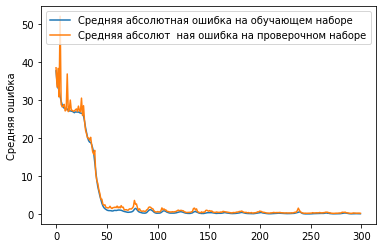

[[12.453272  11.760269   7.8563547  6.16746  ]]
dval [[15 12  1  8]]
[[ 2.54672813  0.23973083 -6.85635471  1.83254004]]


In [56]:

plt.plot(history.history['loss'],
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Средняя абсолют  ная ошибка на проверочном наборе')
plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

#%%

# x_input = array([[70,71,72,73,74,75], [76,77,78,79,80,81], [82,83,84,85,86,87]])
# x_input = x_input.reshape((1, 3, n_features))
x_input = array([dataset[-101:-1]])
yhat = model.predict(x_input, verbose=0)
print(yhat)
print("dval",y_val)
#print(x_input)
print(y_val-yhat)